In [6]:
pickle_file = '/Users/manasvivarma/Downloads/real_life/init_plan_hlg_new2.pickle'
with open(pickle_file, 'rb') as file:
    data = pickle.load(file)


gdf = data['gdf']

In [10]:
gdf.loc[gdf['type'] == 17, 'type'] = 4

In [11]:
DENSITY = {
    4:100,
    5:70,
    6:60,
    7:20,
    8:10,
    9:30,
    10:60,
    11:50,
    12:10
}

NON_BLOCK_LAND_USE = (
    'outside',
    'feasible',
    'road',
    'boundary',

)

BLOCK_LAND_USE = (
    'residential',
    'business',
    'wastemgmt',
    'green_l',
    'green_s',
    'school',
    'hospital_l',
    'hospital_s',
    'recreation',
    'office',
    'waterbody',
    'drainage',
    'intersection',
)

LAND_USE = (
    NON_BLOCK_LAND_USE + BLOCK_LAND_USE)

OUTSIDE = 0
FEASIBLE = 1
ROAD = 2
BOUNDARY = 3
RESIDENTIAL = 4
BUSINESS = 5
WASTEMGMT = 6
GREEN_L = 7
GREEN_S = 8
SCHOOL = 9
HOSPITAL_L = 10
HOSPITAL_S = 11
RECREATION = 12
OFFICE = 13
WATERBODY = 14
DRAINAGE = 15
INTERSECTION = 16


LAND_USE_ID = (
    OUTSIDE,
    FEASIBLE,
    ROAD,
    BOUNDARY,   
    RESIDENTIAL,
    BUSINESS,
    WASTEMGMT,
    GREEN_L,
    GREEN_S,
    SCHOOL,
    HOSPITAL_L,
    HOSPITAL_S,
    RECREATION,
    OFFICE,
    WATERBODY,
    DRAINAGE,
    INTERSECTION
)

NUM_TYPES = len(LAND_USE_ID)


LAND_USE_ID_MAP = dict(
    zip(LAND_USE, LAND_USE_ID))

LAND_USE_ID_MAP_INV = dict(
    zip(LAND_USE_ID, LAND_USE))

PUBLIC_SERVICES_ID = (
    BUSINESS,
    WASTEMGMT,
    SCHOOL,
    (HOSPITAL_L, HOSPITAL_S),
    RECREATION,
    OFFICE
)

PUBLIC_SERVICES = (
    'shopping',
    'wastemgmt',
    'education',
    'medical care',
    'entertainment',
    'office'

)

GREEN_ID = (
    GREEN_L,
    GREEN_S
)
GREEN_AREA_THRESHOLD = 2000

TYPE_COLOR_MAP = {
    'boundary': 'lightgreen',
    'business': 'fuchsia',
    'feasible': 'white',
    'green_l': 'green',
    'green_s': 'lightgreen',
    'hospital_l': 'blue',
    'hospital_s': 'cyan',
    'wastemgmt': 'brown',
    'outside': 'black',
    'residential': 'gray',
    'road': 'black',
    'school': 'orange',
    'recreation': 'lavender',
    'office' : 'red',
    'waterbody': 'darkblue',
    'drainage' : 'black',
    'intersection': 'black'
}

gdf["type_leg"] = gdf["type"].map(lambda x:LAND_USE_ID_MAP_INV[x])

<Axes: >

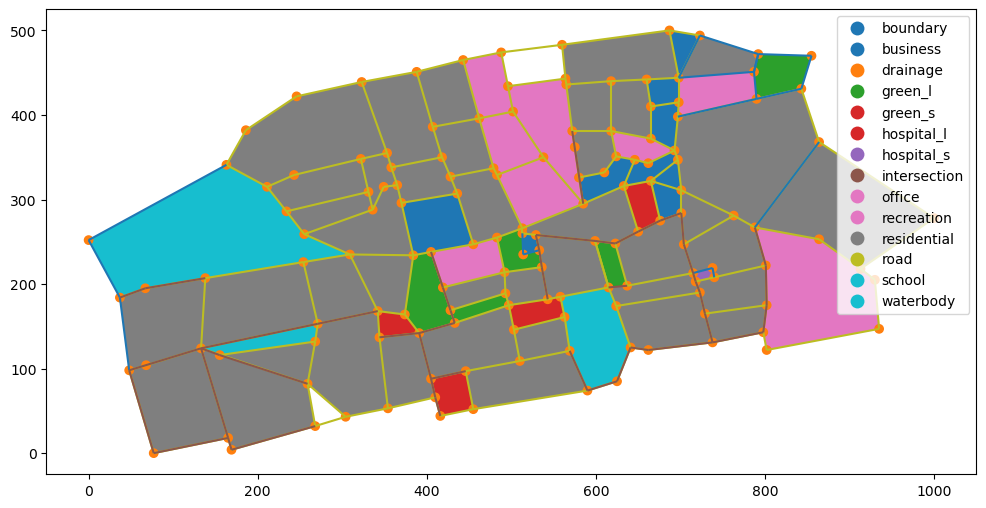

In [12]:
gdf.plot(column="type_leg",legend=True,figsize=(12, 8))

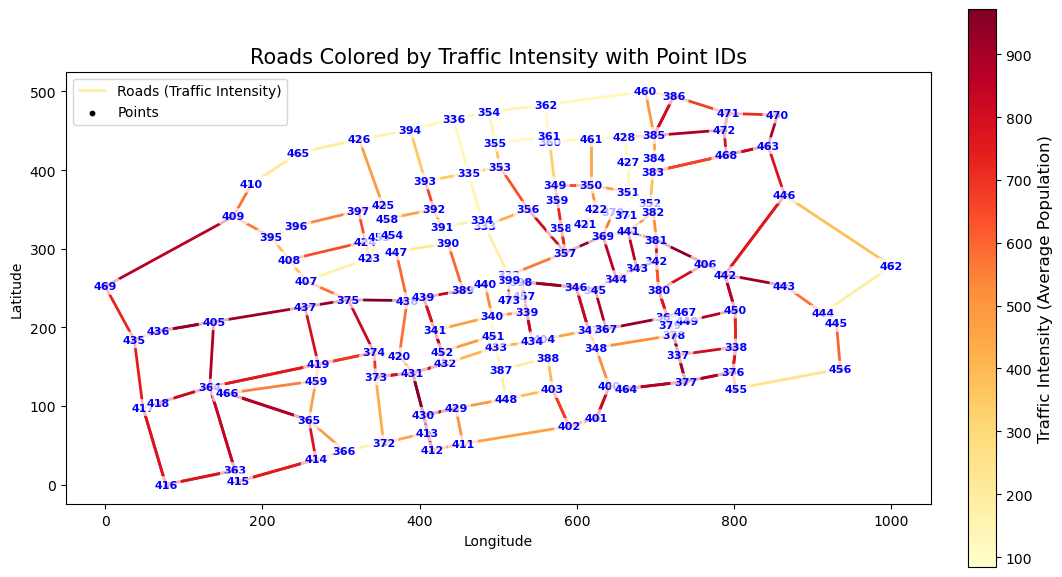

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Filter points and roads
points = gdf[gdf.geometry.geom_type == 'Point']
roads = gdf[gdf.geometry.geom_type == 'LineString']

# Calculate traffic intensity for roads
def get_average_population(line):
    try:
        coords = list(line.geometry.coords)
        start_point, end_point = coords[0], coords[-1]

        # Find population for the start point
        start_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == start_point)]['population']
        start_pop = start_pop.values[0] if not start_pop.empty else 0

        # Find population for the end point
        end_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == end_point)]['population']
        end_pop = end_pop.values[0] if not end_pop.empty else 0

        # Return average
        return (start_pop + end_pop) / 2
    except Exception:
        return 0

# Calculate traffic for each road
traffic_values = roads.apply(get_average_population, axis=1)

# Normalize traffic for color mapping
cmap = plt.cm.YlOrRd  # Yellow-Orange-Red colormap
norm = mcolors.Normalize(vmin=traffic_values.min(), vmax=traffic_values.max())

# Plot roads with traffic intensity
fig, ax = plt.subplots(figsize=(12, 8))
roads.plot(
    ax=ax,
    linewidth=2,
    color=[cmap(norm(value)) for value in traffic_values],
    label='Roads (Traffic Intensity)'
)

# Plot points
points.plot(ax=ax, color='black', markersize=10, label='Points')

# Add color bar for traffic intensity
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('Traffic Intensity (Average Population)', fontsize=12)

# Annotate points with their IDs
for idx, row in points.iterrows():
    point = row.geometry
    point_id = idx  # Use the index as the point ID
    ax.text(
        point.x, point.y, str(point_id), color='blue', fontsize=8,
        ha='center', va='center', fontweight='bold', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Add legend and labels
ax.set_title('Roads Colored by Traffic Intensity with Point IDs', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left')
plt.show()


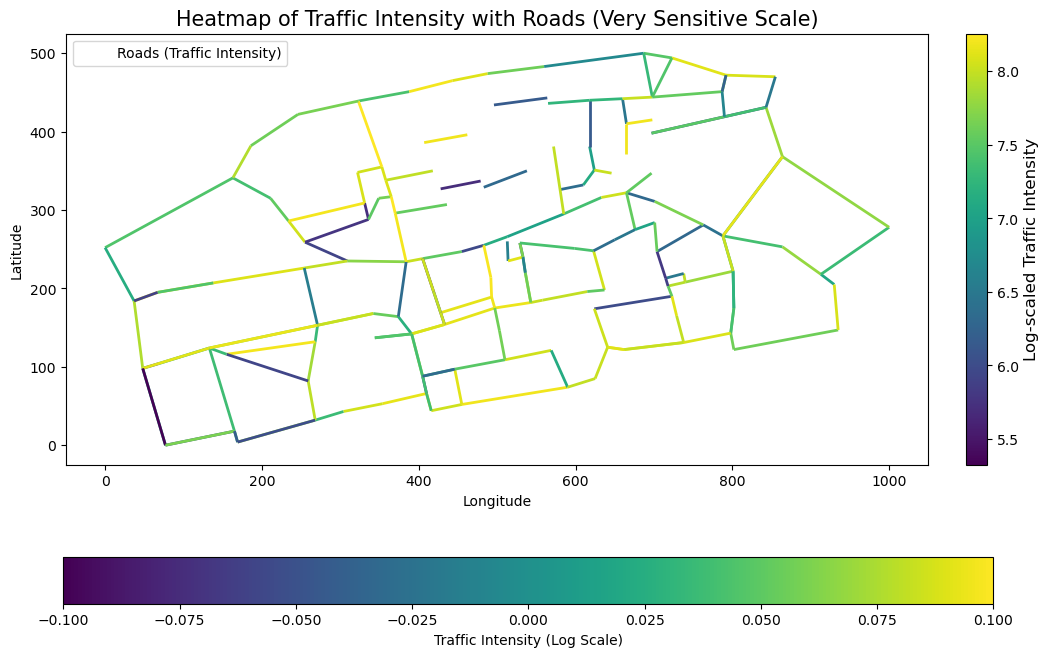

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np

# Step 1: Filter points and roads
points = gdf[gdf.geometry.geom_type == 'Point']
roads = gdf[gdf.geometry.geom_type == 'LineString']

# Step 2: Calculate traffic intensity for roads based on start and end point population
def get_average_population(line):
    try:
        coords = list(line.geometry.coords)
        start_point, end_point = coords[0], coords[-1]

        # Find population for the start point
        start_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == start_point)]['population']
        start_pop = start_pop.values[0] if not start_pop.empty else 0

        # Find population for the end point
        end_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == end_point)]['population']
        end_pop = end_pop.values[0] if not end_pop.empty else 0

        # Return average of start and end population
        return (start_pop + end_pop) / 2
    except Exception:
        return 0

# Step 3: Calculate traffic for each road and add it as a new column in gdf
gdf['traffic'] = gdf[gdf.geometry.geom_type == 'LineString'].apply(get_average_population, axis=1)

# Step 4: Apply a more sensitive normalization using a smaller logarithmic base
log_traffic_values = np.log1p(gdf['traffic']**1.2)  # More sensitive by using a higher exponent for the traffic values

# Step 5: Normalize values for better granularity
cmap = plt.cm.viridis  # 'viridis' has a good perceptual color scale
norm = mcolors.Normalize(vmin=log_traffic_values.min(), vmax=log_traffic_values.max())

# Step 6: Plot the heatmap for polygons based on traffic intensity
fig, ax = plt.subplots(figsize=(12, 8))

# Plot polygons with traffic intensity
gdf[gdf.geometry.geom_type == 'Polygon'].plot(
    column='traffic', ax=ax, legend=True,
    legend_kwds={'label': "Traffic Intensity (Log Scale)", 'orientation': "horizontal"},
    cmap='viridis', alpha=0.6
)

# Step 7: Plot roads on top with their traffic intensity
roads = gdf[gdf.geometry.geom_type == 'LineString']  # Get roads after adding traffic data
roads.plot(
    ax=ax,
    linewidth=2,
    color=[cmap(norm(value)) for value in log_traffic_values],
    label='Roads (Traffic Intensity)',
)

# Add color bar for traffic intensity
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('Log-scaled Traffic Intensity', fontsize=12)

# Add legend and labels
ax.set_title('Heatmap of Traffic Intensity with Roads (Very Sensitive Scale)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left')

# Show the plot
plt.show()


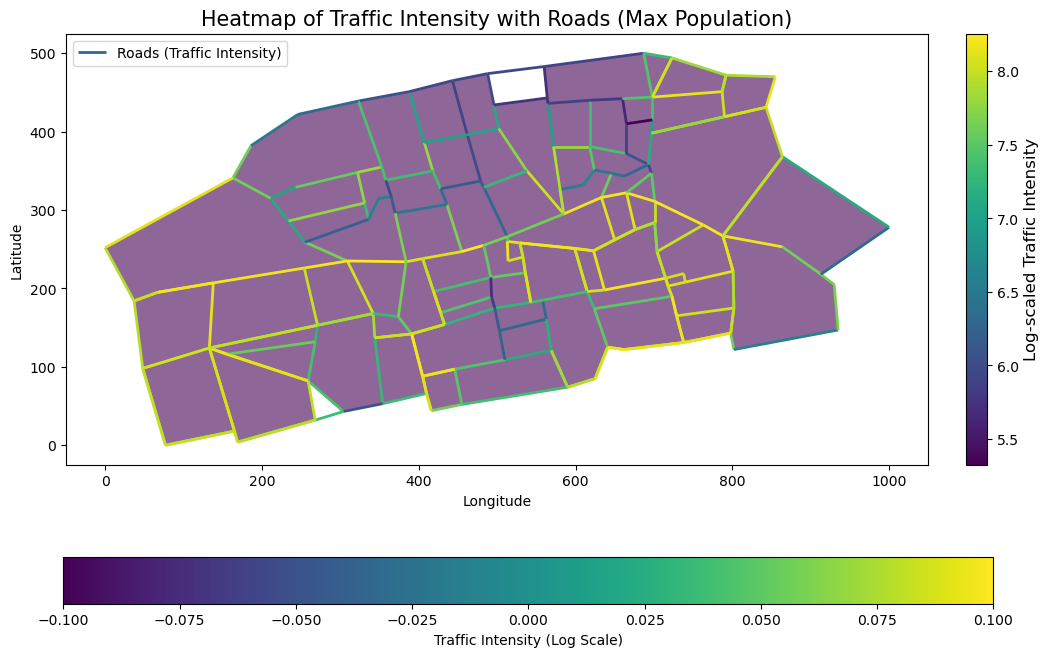

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
import numpy as np

# Step 1: Filter points and roads
points = gdf[gdf.geometry.geom_type == 'Point']
roads = gdf[gdf.geometry.geom_type == 'LineString']

# Step 2: Calculate traffic intensity for roads based on start and end point population
def get_average_population(line):
    try:
        coords = list(line.geometry.coords)
        start_point, end_point = coords[0], coords[-1]

        # Find population for the start point
        start_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == start_point)]['population']
        start_pop = start_pop.values[0] if not start_pop.empty else 0

        # Find population for the end point
        end_pop = points[points.geometry.apply(lambda x: tuple(x.coords[0]) == end_point)]['population']
        end_pop = end_pop.values[0] if not end_pop.empty else 0

        # Return average of start and end population
        return (start_pop + end_pop) / 2
    except Exception:
        return 0

# Step 3: Calculate traffic for each road
traffic_values = roads.apply(get_average_population, axis=1)

# Step 4: Apply a more sensitive normalization using a smaller logarithmic base
log_traffic_values = np.log1p(traffic_values**1.2)  # More sensitive by using a higher exponent for the traffic values

# Step 5: Create a new 'traffic' column for polygons (set it to NaN initially)
gdf['traffic'] = np.nan

# Step 6: Populate the 'traffic' column for polygons based on the maximum population of points within them
def calculate_polygon_traffic(polygon):
    # Find points within this polygon
    points_within = points[points.geometry.within(polygon.geometry)]
    
    # Calculate the maximum population of these points
    if not points_within.empty:
        return points_within['population'].max()  # Return max population
    else:
        return 0  # No points inside, return 0

# Step 7: Assign traffic intensity values to polygons
gdf.loc[gdf.geometry.geom_type == 'Polygon', 'traffic'] = gdf[gdf.geometry.geom_type == 'Polygon'].apply(calculate_polygon_traffic, axis=1)

# Step 8: Normalize the traffic values for better visualization
cmap = plt.cm.viridis  # 'viridis' has a good perceptual color scale
norm = mcolors.Normalize(vmin=log_traffic_values.min(), vmax=log_traffic_values.max())

# Step 9: Plot the heatmap for polygons based on traffic intensity
fig, ax = plt.subplots(figsize=(12, 8))

# Plot polygons with traffic intensity
gdf[gdf.geometry.geom_type == 'Polygon'].plot(
    column='traffic', ax=ax, legend=True,
    legend_kwds={'label': "Traffic Intensity (Log Scale)", 'orientation': "horizontal"},
    cmap='viridis', alpha=0.6
)

# Step 10: Plot roads on top with their traffic intensity
roads.plot(
    ax=ax,
    linewidth=2,
    color=[cmap(norm(value)) for value in log_traffic_values],
    label='Roads (Traffic Intensity)',
)

# Add color bar for traffic intensity
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('Log-scaled Traffic Intensity', fontsize=12)

# Add legend and labels
ax.set_title('Heatmap of Traffic Intensity with Roads (Max Population)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left')

# Show the plot
plt.show()


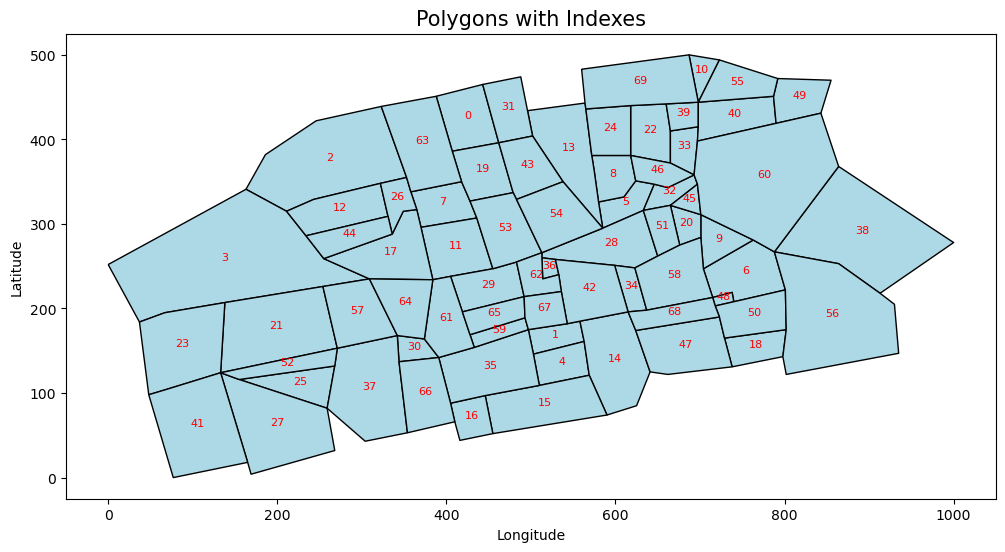

In [20]:
import matplotlib.pyplot as plt

# Step 1: Plot the polygons
fig, ax = plt.subplots(figsize=(12, 8))
gdf[gdf.geometry.geom_type == 'Polygon'].plot(ax=ax, color='lightblue', edgecolor='black')

# Step 2: Calculate centroids of polygons
centroids = gdf[gdf.geometry.geom_type == 'Polygon'].geometry.centroid

# Step 3: Add the index labels at the centroid of each polygon
for idx, centroid in enumerate(centroids):
    ax.text(centroid.x, centroid.y, str(idx), fontsize=8, ha='center', color='red')

# Step 4: Add labels and title
ax.set_title('Polygons with Indexes', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [26]:
# Update population for specific IDs to 200
gdf.loc[gdf.index.isin([28, 51, 20, 2, 63, 14, 57]), 'population'] = 200

# Check the updated population values
print(gdf.loc[gdf.index.isin([28, 51, 20, 2, 63, 14, 57])], ['population'])



                                             geometry  type  population color  \
2   POLYGON ((211 315, 243 329, 322 348, 353 355, ...     4       200.0   red   
14  POLYGON ((569 121, 590 74, 625 85, 641 125, 62...     9       200.0   red   
20  POLYGON ((676 275, 701 284, 701 311, 665 322, ...     5       200.0   red   
28  POLYGON ((633 316, 650 262, 623 248, 599 251, ...     4       200.0   red   
51  POLYGON ((665 322, 676 275, 650 262, 633 316, ...    10       200.0   red   
57  POLYGON ((271 153, 342 168, 309 235, 254 226, ...     4       200.0   red   
63  POLYGON ((323 439, 388 451, 407 386, 418 350, ...     4       200.0   red   

    existence     type_leg  traffic  
2        True  residential      0.0  
14       True       school      0.0  
20       True     business      0.0  
28       True  residential      0.0  
51       True   hospital_l      0.0  
57       True  residential      0.0  
63       True  residential      0.0   ['population']


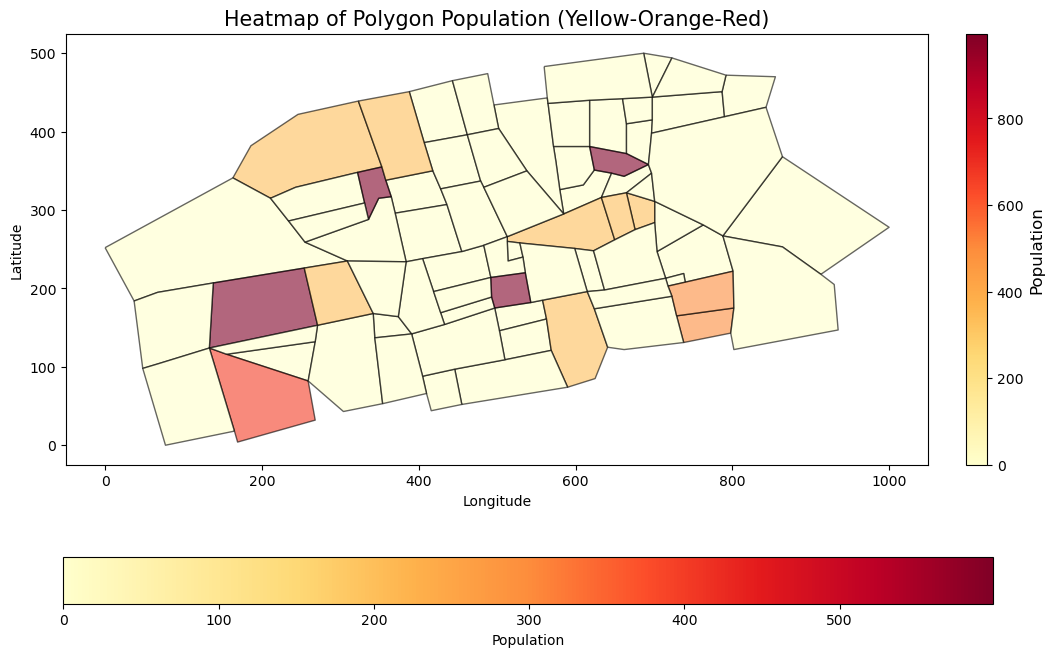

In [27]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Step 1: Use a colormap that transitions from yellow to red (YlOrRd)
cmap = plt.cm.YlOrRd  # Yellow to Orange to Red colormap

# Step 2: Normalize population values to ensure proper color scaling
norm = mcolors.Normalize(vmin=gdf['population'].min(), vmax=gdf['population'].max())

# Step 3: Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Step 4: Plot the polygons using population values for color intensity
gdf[gdf.geometry.geom_type == 'Polygon'].plot(
    column='population', ax=ax, legend=True,
    legend_kwds={'label': "Population", 'orientation': "horizontal"},
    cmap=cmap, alpha=0.6, edgecolor='black'
)

# Step 5: Add a color bar to show the population scale
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('Population', fontsize=12)

# Step 6: Add titles and labels
ax.set_title('Heatmap of Polygon Population (Yellow-Orange-Red)', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()
